In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import xarray as xr
import os
import glob
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import norm
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import seaborn as sns
sns.set_style('white')
sns.set_context("notebook") #[poster, paper, talk, notebook]

In [2]:
fname = '/Users/meganmason491/Documents/research/sierra/data/compiled_SUPERsnow_3km_subregion.nc' #bsu
# fname = '/Users/megmason/research/sierra/data/compiled_SUPERsnow_3km_subregion.nc' #mac

ds = xr.open_dataset(fname, chunks={'time':1,'x':1000,'y':1000})
ds['snow'] = ds.snow / 10
ds.attrs['units'] = 'cm'
ds=ds.astype(np.int16, copy=False)
ds.close()
d = ds.isel(time=31)
print(d)

print('subregion:')
print('x direction length {} [m]:'.format(d.x.max().values - d.x.min().values))
print('y direction length {} [m]:'.format(d.y.max().values - d.y.min().values))

<xarray.Dataset>
Dimensions:  (x: 1000, y: 1000)
Coordinates:
  * x        (x) float32 279207.0 279210.0 279213.0 ... 282201.0 282204.0
  * y        (y) float32 4221327.0 4221324.0 4221321.0 ... 4218333.0 4218330.0
    time     datetime64[ns] 2016-04-26
    mask     (y, x) uint8 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    dem      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    veg      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
Data variables:
    snow     (y, x) int16 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
subregion:
x direction length 2997.0 [m]:
y direction length 2997.0 [m]:


In [ ]:
plt.imshow(d.snow, cmap='RdBu', vmax=100)
plt.colorbar()

In [ ]:
# d = d.isel(x=slice(500,700), y=slice(700,900))
# d = d.isel(x=slice(500,503), y=slice(700,703))
d = d.sel(x=slice(280707.0,280767.0), y=slice(4219227.0,4219167.0))

In [ ]:
d.coords

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.tight_layout()
d.snow.plot(cmap='RdBu')
# d.snow.plot.hist()

In [ ]:
ds

In [ ]:
# dpeak = ds.isel(time=[0,7,18,30,42,49]) 
# dpeak.close()
# ds = dpeak
snow_plot = ds.snow.plot(x='x', y='y', col='time', col_wrap=3,
            cbar_kwargs={'label': 'snow depth [cm]'})

In [ ]:
fig=plt.figure(figsize=(15,15))
plt.imshow(d.snow, cmap='RdBu', vmax=50)
plt.colorbar()

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(mpl.ticker.MultipleLocator(30))
plt.gca().yaxis.set_minor_locator(mpl.ticker.MultipleLocator(30))
plt.grid(which="both", linewidth=0.5,color="k")
plt.tick_params(which="minor", length=0)

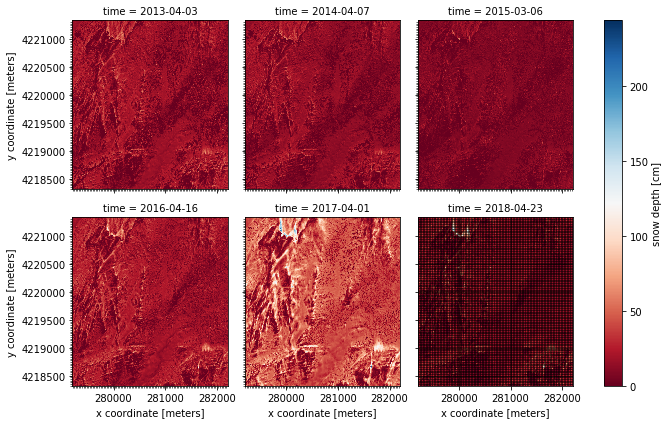

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

fname = '/Users/megmason/research/sierra/data/compiled_SUPERsnow_3km_subregion.nc'

ds = xr.open_dataset(fname, chunks={'time':1,'x':1000,'y':1000})
ds['snow'] = ds.snow / 10
ds.attrs['units'] = 'cm'
ds=ds.astype(np.int16, copy=False)
ds = ds.isel(time=[0,7,18,30,42,49])
ds.close()


snow_plot = ds.snow.plot(x='x', y='y', col='time', col_wrap=3,
                         cmap='RdBu',
            cbar_kwargs={'label': 'snow depth [cm]'})
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(mpl.ticker.MultipleLocator(30))
plt.gca().yaxis.set_minor_locator(mpl.ticker.MultipleLocator(30))
plt.grid(which="both", linewidth=0.5,color="k")
plt.tick_params(which="minor", length=0)
plt.show()

In [3]:
ds

<xarray.Dataset>
Dimensions:  (time: 51, x: 1000, y: 1000)
Coordinates:
  * x        (x) float32 279207.0 279210.0 279213.0 ... 282201.0 282204.0
  * y        (y) float32 4221327.0 4221324.0 4221321.0 ... 4218333.0 4218330.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    dem      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    veg      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
Data variables:
    snow     (time, y, x) int16 dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>

In [6]:
#build spatial matrix, to compute mean on

'''ex. np.array([[0, 0, 0, 1, 1, 1,
                      0, 0, 0, 1, 1, 1, 
                      0, 0, 0, 1, 1, 1, 
                      ...
                      5, 5, 5, 6, 6, 6, 
                      5, 5, 5, 6, 6, 6,
                      5, 5, 5, 6, 6, 6]])
'''
sz = 10000
grid = 10 # grid*3m ALS data = 30m 
s_mat = np.arange(sz, dtype=int).reshape(int(np.sqrt(sz)), int(np.sqrt(sz))) #reshape using sqrt
s_mat = np.kron(s_mat, np.ones((grid,grid), dtype=s_mat.dtype)) #kronecter product gives 2d repeating matrix
print(s_mat.shape)
s_mat



(1000, 1000)


array([[   0,    0,    0, ...,   99,   99,   99],
       [   0,    0,    0, ...,   99,   99,   99],
       [   0,    0,    0, ...,   99,   99,   99],
       ...,
       [9900, 9900, 9900, ..., 9999, 9999, 9999],
       [9900, 9900, 9900, ..., 9999, 9999, 9999],
       [9900, 9900, 9900, ..., 9999, 9999, 9999]])

In [7]:
da = xr.DataArray(s_mat, 
                  dims=('y','x')) #add coords??
da

<xarray.DataArray (y: 1000, x: 1000)>
array([[   0,    0,    0, ...,   99,   99,   99],
       [   0,    0,    0, ...,   99,   99,   99],
       [   0,    0,    0, ...,   99,   99,   99],
       ...,
       [9900, 9900, 9900, ..., 9999, 9999, 9999],
       [9900, 9900, 9900, ..., 9999, 9999, 9999],
       [9900, 9900, 9900, ..., 9999, 9999, 9999]])
Dimensions without coordinates: y, x

In [8]:
s = ds.isel(time=3)
s

<xarray.Dataset>
Dimensions:  (x: 1000, y: 1000)
Coordinates:
  * x        (x) float32 279207.0 279210.0 279213.0 ... 282201.0 282204.0
  * y        (y) float32 4221327.0 4221324.0 4221321.0 ... 4218333.0 4218330.0
    time     datetime64[ns] 2013-05-25
    mask     (y, x) uint8 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    dem      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    veg      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
Data variables:
    snow     (y, x) int16 dask.array<chunksize=(1000, 1000), meta=np.ndarray>

In [9]:
s=s.assign_coords(grid=da)
s

<xarray.Dataset>
Dimensions:  (x: 1000, y: 1000)
Coordinates:
  * x        (x) float32 279207.0 279210.0 279213.0 ... 282201.0 282204.0
  * y        (y) float32 4221327.0 4221324.0 4221321.0 ... 4218333.0 4218330.0
    time     datetime64[ns] 2013-05-25
    mask     (y, x) uint8 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    dem      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    veg      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    grid     (y, x) int64 0 0 0 0 0 0 0 0 ... 9999 9999 9999 9999 9999 9999 9999
Data variables:
    snow     (y, x) int16 dask.array<chunksize=(1000, 1000), meta=np.ndarray>

In [10]:
test = s.snow.groupby('grid').groups


In [ ]:
# s = ds.stack(gridcell=['x', 'y'])
# s.groupby('gridcell').groups
